In [1]:
%run ./tools.ipynb
# import all the necessary modules 
# import all functions needed to post process

In [ ]:
%%bash

year=2018

#cd /geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/
#cd CO2-$year
#pwd
    
#mkdir nd51
#mv ts_satellite.* nd51
#cp tracerinfo.dat nd51
#cp diaginfo.dat nd51
    
for month in 1 2 3 4 5 6 7 8 9 10 11 12
do
    cd /geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/
    
    # add 0 before the month string if it is smaller than 10
    if [ $month -gt 9 ];
    then
    month_string="$month"
    else
    month_string="0$month"
    fi

    # case directory
    cd CO2-net-$year-$month_string
    pwd
    
    mkdir nd51
    mv ts_satellite.* nd51
    cp tracerinfo.dat nd51
    cp diaginfo.dat nd51

done

In [ ]:
%%time
### this cell could do all post-processing for a case, over a few months, or one month

year = 2018
for assim_month in range(9,13): # assimilation window
#assim_month = 3 
    for imonth in range(assim_month-2,assim_month): # months of tagged runs
        # case directory
        case_name = 'CO2-casa-2018-' + month_string(imonth)
        mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/nd51/'

        # convert bpch files to netcdf
        bpch_to_nc_mass(data_dir = mod_dir,
                                year = year,
                                month = assim_month)
        # combine daily outputs into monthly
        combine_daily_to_one(data_dir = mod_dir,
                                 year = year,
                                 month = assim_month,
                                 str1 = 'ts_satellite.',
                                 str2 = '.nc')
        # flatten 4d to 2d array
        flatten_4d_to_2d(data_dir = mod_dir,
                                 year = year,
                                 month = assim_month,
                                 str1 = 'ts_satellite.',
                                 str2 = '.nc')
        # interpolate to satellite grid
        interpolate_model_to_satellite2(mod_dir = mod_dir, 
                                               sat_dir = '/geos/u73/msadiq/satellite/oco-2/', 
                                               year = year, 
                                               month = assim_month, 
                                               str1_mod = '2d_ts_satellite.', 
                                               str1_sat = '2d_OCO2_extract_',
                                               background = 100)
        # calculate XCO2 difference
        delta_Y(mod_dir = mod_dir, 
                    sat_dir = '/geos/u73/msadiq/satellite/oco-2/', 
                    year = year, 
                    month = assim_month, 
                    str1_mod = 'interpolated_2d_ts_satellite.', 
                    str1_sat = '2d_OCO2_extract_',
                    mode = 'N')


converted daily bpch outputs to netcdf format
created ts_satellite.201809.nc
created 2d_ts_satellite.201809.nc
interpolation began
SpeciesConc_CO2Tag1 done
SpeciesConc_CO2Tag2 done
SpeciesConc_CO2Tag3 done
SpeciesConc_CO2Tag4 done
SpeciesConc_CO2Tag5 done
SpeciesConc_CO2Tag6 done
SpeciesConc_CO2Tag7 done
SpeciesConc_CO2Tag8 done
SpeciesConc_CO2Tag9 done
SpeciesConc_CO2Tag10 done
SpeciesConc_CO2Tag11 done
SpeciesConc_CO2Tag12 done
SpeciesConc_CO2Tag13 done
SpeciesConc_CO2Tag14 done
SpeciesConc_CO2Tag15 done
SpeciesConc_CO2Tag16 done
SpeciesConc_CO2Tag17 done
SpeciesConc_CO2Tag18 done
SpeciesConc_CO2Tag19 done
SpeciesConc_CO2Tag20 done
SpeciesConc_CO2Tag21 done
SpeciesConc_CO2Tag22 done
created interpolated_2d_ts_satellite.201809.nc
created delta_y0_model_N_9.nc
converted daily bpch outputs to netcdf format
created ts_satellite.201809.nc
created 2d_ts_satellite.201809.nc
interpolation began
SpeciesConc_CO2Tag1 done
SpeciesConc_CO2Tag2 done
SpeciesConc_CO2Tag3 done
SpeciesConc_CO2Tag4 don

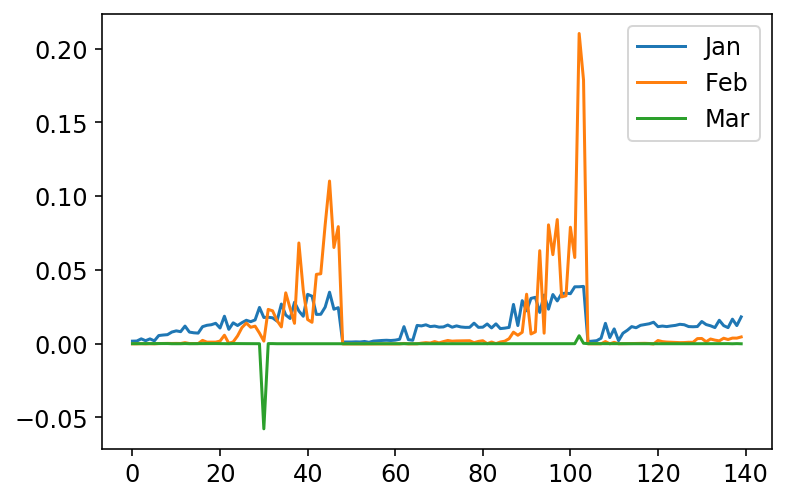

In [11]:
year = 2018
assim_month = 3
top_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/'
mod_dir = top_dir + 'CO2-' + str(year) + '/nd51/'
# 1, read in from full CO2 simulations
name_month = short_name_of_month(assim_month) # Jan, Feb, Mar, ...
xco2_file = 'XCO2_mod_and_oco2_N_' + name_month + '.nc'
ds_xco2 = xr.open_dataset(mod_dir + xco2_file)
xco2_oco2  = ds_xco2['xco2_oco2']  # XCO2 from OCO-2
xco2_model = ds_xco2['xco2_model'] # XCO2 from model
xco2_error = ds_xco2['xco2_error'] # measurement error from OCO-2
diff = ds_xco2['xco2_oco2'] - ds_xco2['xco2_model']
# reduce the size of above arrays and matrices, from ~400k to <3k
x = xco2_oco2.copy()
x = x[np.logical_not(np.isnan(x))]
ind = x.record.values   # index for slicing

for i in range(3):
    mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-casa-2018-0' + str(i+1) + '/nd51/'
    fname = 'delta_y0_model_N_3.nc'
    ds = xr.open_dataset(mod_dir + fname)
    tmp = ds['X_SpeciesConc_CO2Tag10'][ind].values
    plt.plot(tmp[10:150], label = short_name_of_month(i+1))
plt.legend()


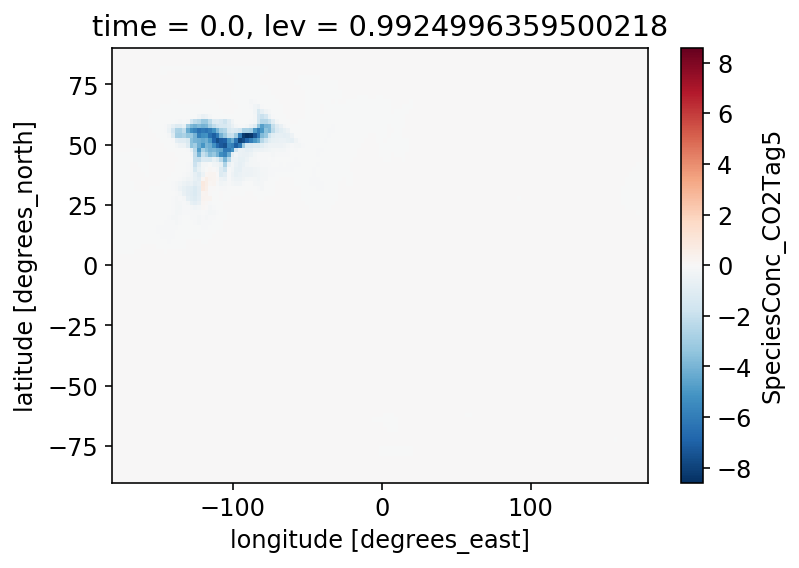

In [3]:
# Convert one bpch file and check
case_name = 'CO2-bio-2018-07'
directory = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/'
name_bpch = 'ts_satellite.20180708.bpch'
bpchfile = directory + name_bpch
tinfo_file = directory + 'tracerinfo.dat'
dinfo_file = directory + 'diaginfo.dat'
# Output
output_directory = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/' + case_name + '/'
ncfile = output_directory + 'ts_satellite.20180708.nc'

bpch_2_netcdf(bpchfile=bpchfile, 
                tinfo_file=tinfo_file, 
                dinfo_file=dinfo_file, 
                ncfile=ncfile)
ds_tmp = xr.open_dataset(ncfile)
diff = ds_tmp['SpeciesConc_CO2Tag11'] - ds_tmp['SpeciesConc_CO2Tag13']
#diff[0,0,:,:].plot()
dr = (ds_tmp['SpeciesConc_CO2Tag5'][0,0,:,:] - 1e5)/1e3
dr.plot()